In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Formulae for calculating position encoding for the position vector

$$

\text{Odd dimensions of the encodings :} \\ 

PE_{pos, 2i+1} = cos(\frac{pos}{10000^{\frac{2i+1}{d_{model}} }})
\\
\\
\text{Even dimensions of the encodings :} \\

PE_{pos, 2i} = sin(\frac{pos}{10000^{\frac{2i}{d_{model}} }})

$$

#### Here, i is the dimension index, and pos is the position of the token in the index

## Position Encoding Function

In [2]:


def get_positional_encoding(sentence, d_model=512):
    # Tokenize the sentence
    tokens = sentence.split()
    seq_len = len(tokens)
    
    # Initialize the positional encoding matrix
    positional_encoding = np.zeros((seq_len, d_model))
    
    # Generate the positional encoding
    for pos in range(seq_len):
        for i in range(0, d_model, 2):
            ## Reduces loops steps by half

            ## Using Sine to encode even dimensions
            positional_encoding[pos, i] = np.sin(pos / (10000 ** ((2 * i) / d_model)))
            if i + 1 < d_model:
                ## Using Cosine to encode the odd dimensions of the encoding
                positional_encoding[pos, i + 1] = np.cos(pos / (10000 ** ((2 * (i + 1)) / d_model)))

    return tokens, positional_encoding



### Visualizing the Odd and Even encoding schema of the input tokens

Tokens: ['This', 'is', 'a', 'relatively', 'long', 'sentence', 'to', 'visualize', 'how', 'the', 'adjacent', 'words', 'are', 'encoded', 'more', 'identically', 'compared', 'to', 'the', 'words', 'which', 'are', 'far', 'off', 'in', 'the', 'sentence.']
Positional Encoding:
[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  8.46009110e-01  3.10983593e-01  9.84230234e-01
   9.98334166e-02  9.98419278e-01  3.16175064e-02  9.99841890e-01
   9.99983333e-03  9.99984189e-01  3.16227239e-03  9.99998419e-01
   9.

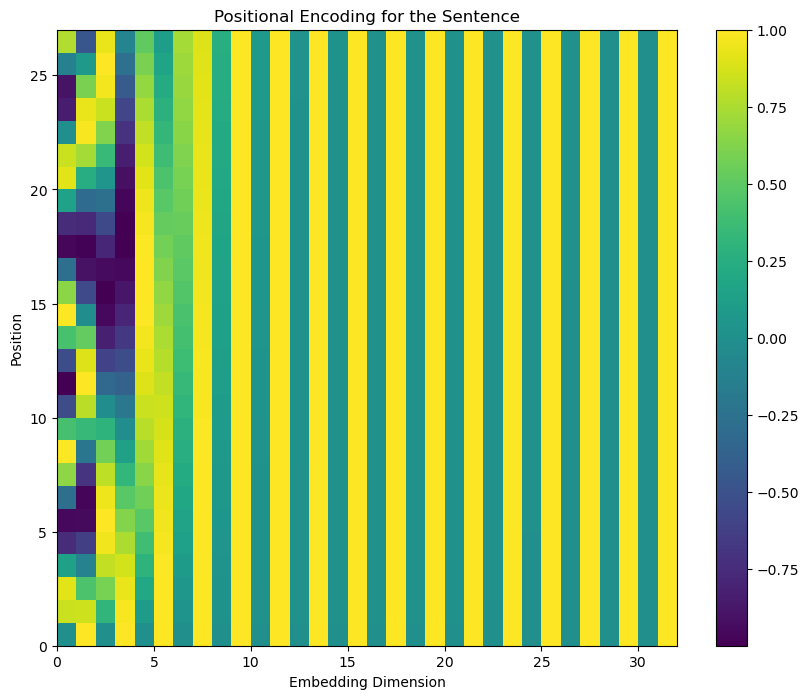

In [14]:
# Sentence to encode
sentence = "This is a relatively long sentence to visualize how the adjacent words are encoded more identically compared to the words which are far off in the sentence. "

# Get positional encoding
tokens, pos_enc = get_positional_encoding(sentence, d_model=32)  # Reduced d_model for better visualization

# Display the positional encoding
print("Tokens:", tokens)
print("Positional Encoding:")
print(pos_enc)

# Visualize the positional encoding
plt.figure(figsize=(10, 8))
plt.pcolormesh(pos_enc, cmap='viridis')
plt.ylabel('Position')
plt.xlabel('Embedding Dimension')
plt.colorbar()
plt.title('Positional Encoding for the Sentence')
plt.show()


### Testing out the near tokens and far off dependencies in input tokens

In [18]:
def calculate_cosine_similarity(vec1, vec2):

    dot_product = np.dot(vec1, vec2)

    norm_1 = np.linalg.norm(vec1)
    norm_2 = np.linalg.norm(vec2)

    return (dot_product/(norm_1 * norm_2))


## Cosine similarity between the first the and last token in the sequence
calculate_cosine_similarity(pos_enc[0], pos_enc[-1])

0.7938707694002273

In [19]:
## cosine similarity score between two adjacentt tokens in the input sequence
calculate_cosine_similarity(pos_enc[5], pos_enc[6])

0.9857517423455591